## "Interactive multi-objective path planning algorithm for accessible sidewalks"
### Bachelor Thesis Code by Alisa Todorova

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import geopandas as gpd
import momepy
import networkx as nx
import shapely
import shapely.geometry as sg

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
map = gpd.read_file("Sidewalk_width_crossings_small.geojson") #Read in the map

# Objectives
objective1 = map['length']
objective2 = map['crossing']
objective3 = map['obstacle_free_width']
objectives = [objective1, objective2, objective3]

S = map['start_coord'] #Starting node
T = map['end_coord'] #Terminating (ending) node


/usr/local/anaconda3/envs/test/lib/python3.10/site-packages/momepy/utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


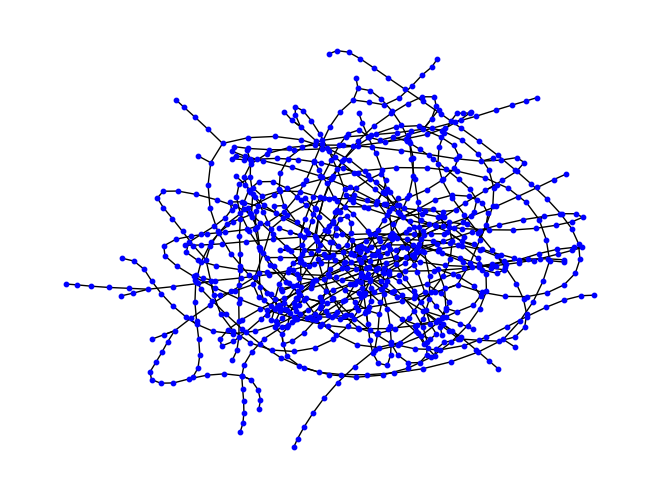

In [13]:
# Create a NetworkX graph from the map
G = momepy.gdf_to_nx(map, approach='primal')
nodes = G.nodes
edges = G.edges

# Display the graph
nx.draw(G, with_labels=False, node_color='blue', node_size=10, edge_color='black')
plt.axis('off')
plt.show()

## Blackboxes
The Gaussian process and Acquisition function are used as blackboxes from "Ordered Preference Elicitation Strategies for Supporting Multi-Objective Decision Making" by Luisa M. Zintgraf, Diederik M. Roijers, Sjoerd Linders, Catholijn M. Jonker, and Ann Nowé, which was published at AAMAS (Autonomous Agents and Multi-Agent Systems), Stockholm 2018. https://github.com/lmzintgraf/gp_pref_elicit


In [ ]:
import gaussian_process
import acquisition_function

gp = gaussian_process.GPPairwise(num_objectives=2)
af = acquisition_function.DiscreteAcquirer()

u = gp.initialise_gaussian_process() #Initialise the Gaussian process
u_hat = af.initialise_acquirer() #Initialise acquisition function

## Outer-loop: Selecting the target direction

In [ ]:
P = set() #Pareto set

# Path initialisation
for i in objectives:
    p = nx.shortest_path(G, source = i, method = 'dijkstra')
    P = P.add(p)


## Inner-loop: Finding a new path from the target region